In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import jenkspy
from collections import Counter

In [114]:
# recall4 data
recall1_cond_df = pd.read_csv('recall1_stats_df_condition_0612.csv')
recall1_age_df = pd.read_csv('recall1_stats_df_age_0612.csv')
recall1_sex_df = pd.read_csv('recall1_stats_df_sex_0612.csv')

recall1_cond_df = recall1_cond_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall1_age_df = recall1_age_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall1_sex_df = recall1_sex_df.sort_values(['name', 'syllable']).reset_index(drop=True)

# to prevent the data from rounding errors 
decimal_places = 8
recall1_cond_df = recall1_cond_df.round(decimal_places)
recall1_age_df = recall1_age_df.round(decimal_places)
recall1_sex_df = recall1_sex_df.round(decimal_places)

# extract property information 
age = recall1_age_df[['name', 'syllable', 'group']]
sex = recall1_sex_df[['name', 'syllable', 'group']]

# Mergeg all group information
recall1_cond_df = recall1_cond_df.merge(age, on=['name', 'syllable'], suffixes=('', '_age'))
recall1_cond_df = recall1_cond_df.merge(sex, on=['name', 'syllable'], suffixes=('', '_sex'))

#rename all group information columns  
recall1_moseq_data = recall1_cond_df.rename(columns={'group': 'condition', 'group_age': 'age', 'group_sex': 'sex'})

recall1_moseq_data.head(10)

,condition,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,age,sex
0,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.626208,1.852853,-3.108747,3.122723,-0.000510,17.404694,-183.203679,188.040866,81.701471,75.348639,1.813967,420.626644,0.203390,1.305556,young,male
1,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,0.047414,1.886025,-3.118931,3.088203,-0.306084,21.693177,-186.768078,186.453910,114.326372,71.326542,5.065943,324.631877,0.084746,2.040000,young,male
2,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,2.541553,0.006534,2.530331,2.554167,0.513064,1.403439,-1.160512,3.587451,19.581478,13.585931,1.088061,45.789062,0.016949,0.800000,young,male
3,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,1.040338,2.274850,-2.304735,2.978832,-5.650671,33.930670,-185.178904,3.523885,29.659879,24.827263,1.021446,113.470288,0.084746,0.400000,young,male
4,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,1.190056,0.914027,-2.351293,2.675502,0.466974,4.355024,-5.952834,13.459587,98.441224,64.394974,3.216328,286.923149,0.084746,1.426667,young,male
5,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,5,1.591083,1.391498,-2.918128,2.984716,0.606301,15.508504,-9.353394,179.743852,57.037060,64.958918,4.752641,370.035373,0.067797,2.300000,young,male
6,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,6,0.513579,1.393588,-1.466723,2.905437,3.107282,10.342098,-40.495488,38.495383,121.945589,62.437526,15.226925,265.955670,0.033898,1.366667,young,male
7,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,7,-2.098126,0.413054,-2.465035,-1.097394,2.729345,2.644754,0.713620,7.987800,74.586815,42.689324,8.890899,131.081876,0.016949,1.066667,young,male
8,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,8,-0.654046,2.269390,-3.130824,3.139795,-1.881786,41.805873,-187.878988,187.563840,123.793678,66.685021,0.000000,324.182662,0.084746,2.680000,young,male
9,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,9,-1.111840,2.055914,-3.117722,2.903392,2.370174,46.514172,-182.107538,182.445727,69.507202,43.389691,15.498033,170.455945,0.067797,0.533333,young,male


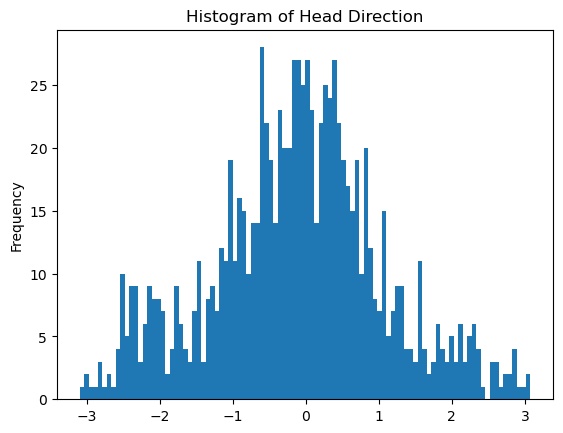

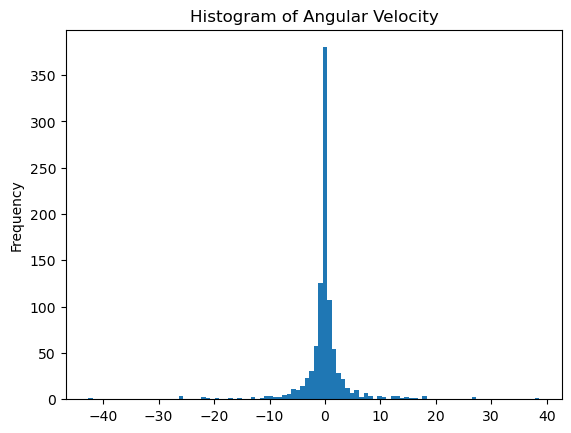

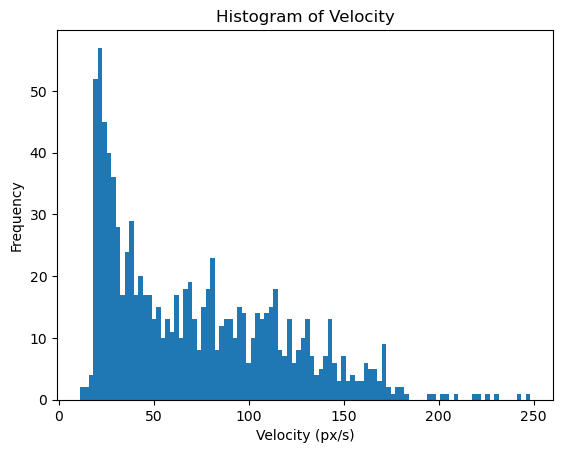

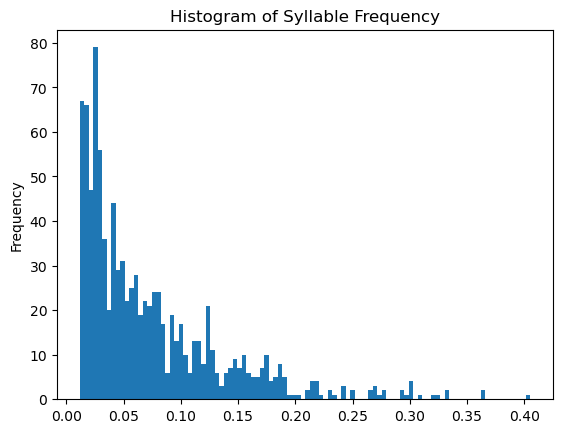

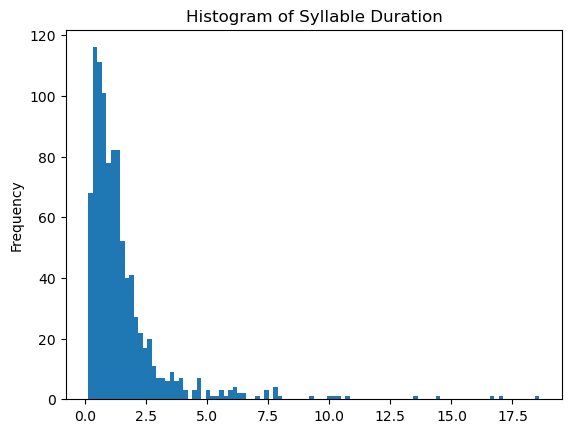

In [115]:
recall1_moseq_data['heading_mean'].plot.hist(bins=100)
# plt.xlabel('Velocity (px/s)')
# plt.ylabel('Frequency')
plt.title('Histogram of Head Direction')
plt.show()

recall1_moseq_data['angular_velocity_mean'].plot.hist(bins=100)
# plt.xlabel('Velocity (px/s)')
# plt.ylabel('Frequency')
plt.title('Histogram of Angular Velocity')
plt.show()

recall1_moseq_data['velocity_px_s_mean'].plot.hist(bins=100)
plt.xlabel('Velocity (px/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Velocity')
plt.show()

recall1_moseq_data['frequency'].plot.hist(bins=100)
# plt.xlabel('Velocity (px/s)')
# plt.ylabel('Frequency')
plt.title('Histogram of Syllable Frequency')
plt.show()

recall1_moseq_data['duration'].plot.hist(bins=100)
# plt.xlabel('Velocity (px/s)')
# plt.ylabel('Frequency')
plt.title('Histogram of Syllable Duration')
plt.show()

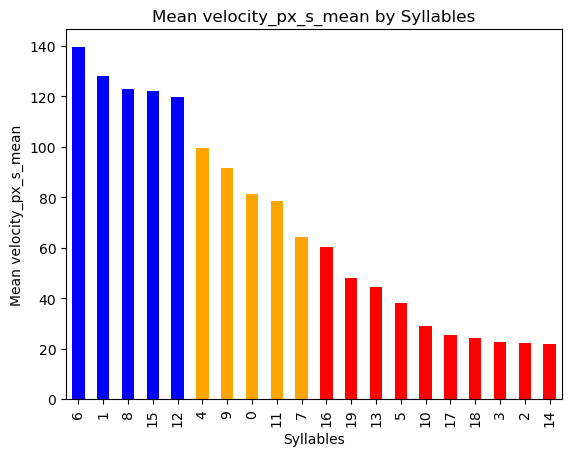

In [141]:
velocity_breaks = jenkspy.jenks_breaks(recall1_moseq_data['velocity_px_s_mean'].to_numpy(), n_classes=3)

# Create a function to categorize the data based on the breaks
def categorize_velocity(value):
    if value <= velocity_breaks[1]:
        return 'low'
    elif value <= velocity_breaks[2]:
        return 'medium'
    else:
        return 'high'

# Apply the categorization
recall1_moseq_data['velocity_cat'] = recall1_moseq_data['velocity_px_s_mean'].apply(categorize_velocity)

# Determine the majority category for each syllable
def majority_category(categories):
    return Counter(categories).most_common(1)[0][0]

velocity_syllable_categories = recall1_moseq_data.groupby('syllable')['velocity_cat'].apply(majority_category).reset_index()

# Merge the majority categories back with the mean velocities
mean_velocity = recall1_moseq_data.groupby('syllable')['velocity_px_s_mean'].median().reset_index()
mean_velocity = mean_velocity.merge(velocity_syllable_categories, on='syllable')

# Plotting the bar graph with categories for velocity
colors = {'low': 'red', 'medium': 'orange', 'high': 'blue'}
mean_velocity['color'] = mean_velocity['velocity_cat'].map(colors)
mean_velocity = mean_velocity.sort_values(by='velocity_px_s_mean', ascending=False)
mean_velocity.set_index('syllable')['velocity_px_s_mean'].plot(kind='bar', color=mean_velocity['color'])

# Set the labels and title
plt.xlabel('Syllables')
plt.ylabel('Mean velocity_px_s_mean')
plt.title('Mean velocity_px_s_mean by Syllables')

# Show the plot
plt.show()

/Users/novak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


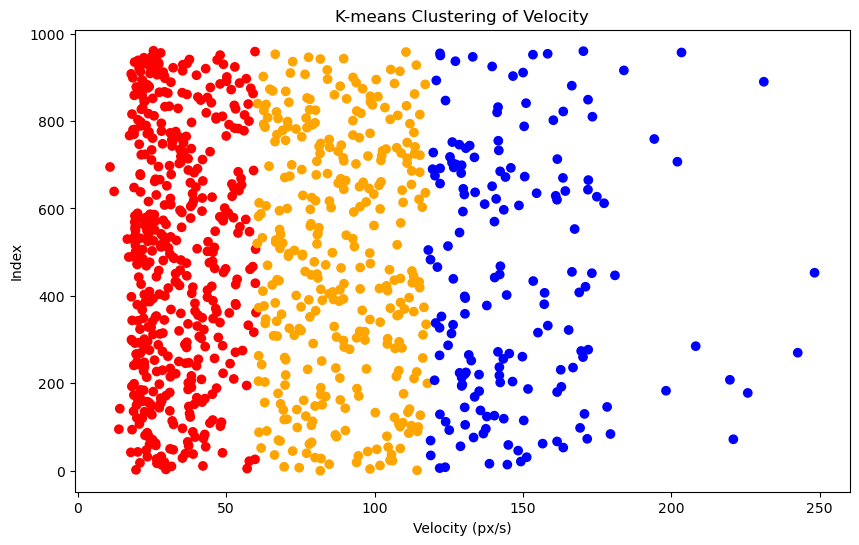

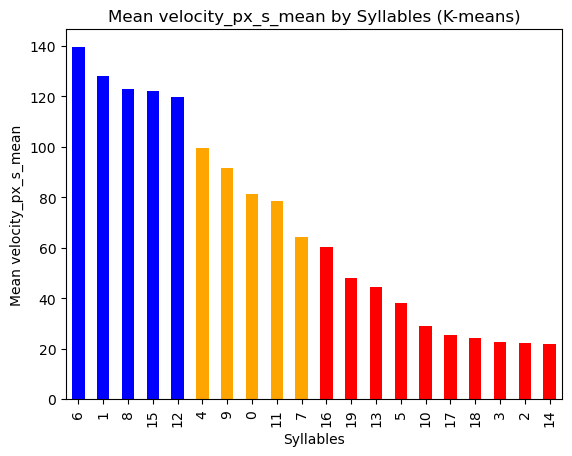

In [142]:
# k-means clustering for 'velocity_px_s_mean' with separate names
kmeans = KMeans(n_clusters=3, random_state=0)
recall1_moseq_data['velocity_cluster'] = kmeans.fit_predict(recall1_moseq_data[['velocity_px_s_mean']])

# Determine which cluster is 'low', 'medium', 'high' based on the centroids
centroids = kmeans.cluster_centers_.flatten()
centroid_order = centroids.argsort()

cluster_mapping = {centroid_order[0]: 'low', centroid_order[1]: 'medium', centroid_order[2]: 'high'}
recall1_moseq_data['velocity_cluster_cat'] = recall1_moseq_data['velocity_cluster'].map(cluster_mapping)

# Determine the majority category for each syllable
velocity_cluster_syllable_categories = recall1_moseq_data.groupby('syllable')['velocity_cluster_cat'].apply(majority_category).reset_index()

# Merge the majority categories back with the mean velocities
mean_velocity_cluster = recall1_moseq_data.groupby('syllable')['velocity_px_s_mean'].median().reset_index()
mean_velocity_cluster = mean_velocity_cluster.merge(velocity_cluster_syllable_categories, on='syllable')

# Plotting the k-means clustering result
plt.figure(figsize=(10, 6))
recall1_moseq_data['color'] = recall1_moseq_data['velocity_cluster_cat'].map(colors)
plt.scatter(recall1_moseq_data['velocity_px_s_mean'], recall1_moseq_data.index, c=recall1_moseq_data['color'])
plt.xlabel('Velocity (px/s)')
plt.ylabel('Index')
plt.title('K-means Clustering of Velocity')
plt.show()

# Plotting the bar graph with categories for velocity cluster
mean_velocity_cluster['color'] = mean_velocity_cluster['velocity_cluster_cat'].map(colors)
mean_velocity_cluster = mean_velocity_cluster.sort_values(by='velocity_px_s_mean', ascending=False)
mean_velocity_cluster.set_index('syllable')['velocity_px_s_mean'].plot(kind='bar', color=mean_velocity_cluster['color'])

# Set the labels and title
plt.xlabel('Syllables')
plt.ylabel('Mean velocity_px_s_mean')
plt.title('Mean velocity_px_s_mean by Syllables (K-means)')
plt.show()
